<a href="https://colab.research.google.com/github/swagata0207/DSP_cars/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Connecting google drive with colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Read csv file using pandas
df = pd.read_csv('/content/gdrive/My Drive/Datasets/cars.csv')
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US


In [ ]:
#Column informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           406 non-null    float64
 2   Cylinders     406 non-null    int64  
 3   Displacement  406 non-null    float64
 4   Horsepower    406 non-null    float64
 5   Weight        406 non-null    float64
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    int64  
 8   Origin        406 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.7+ KB


In [ ]:
#duplicate value check-up
duplicate_value = df[df.duplicated() == True]
duplicate_value

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Manufacturer


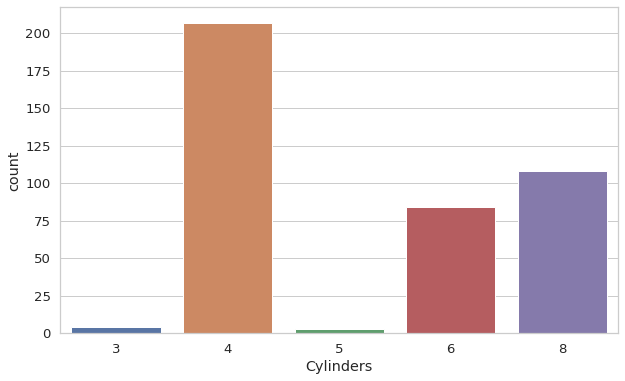

In [ ]:
#No of cylinders in the engine of cars in list using Seaborn Countplot
plt.figure(figsize = (10, 6))
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
sns.countplot(x='Cylinders',data = df)
plt.show()

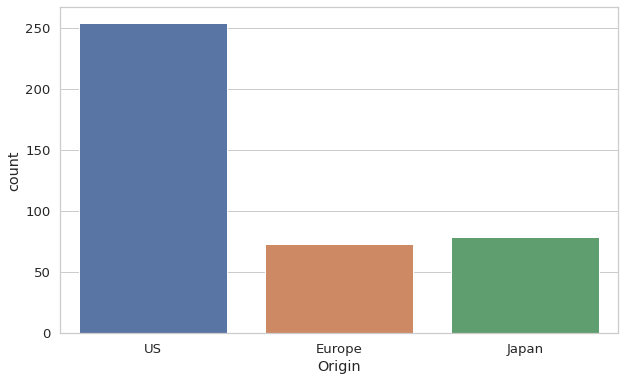

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(x='Origin',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


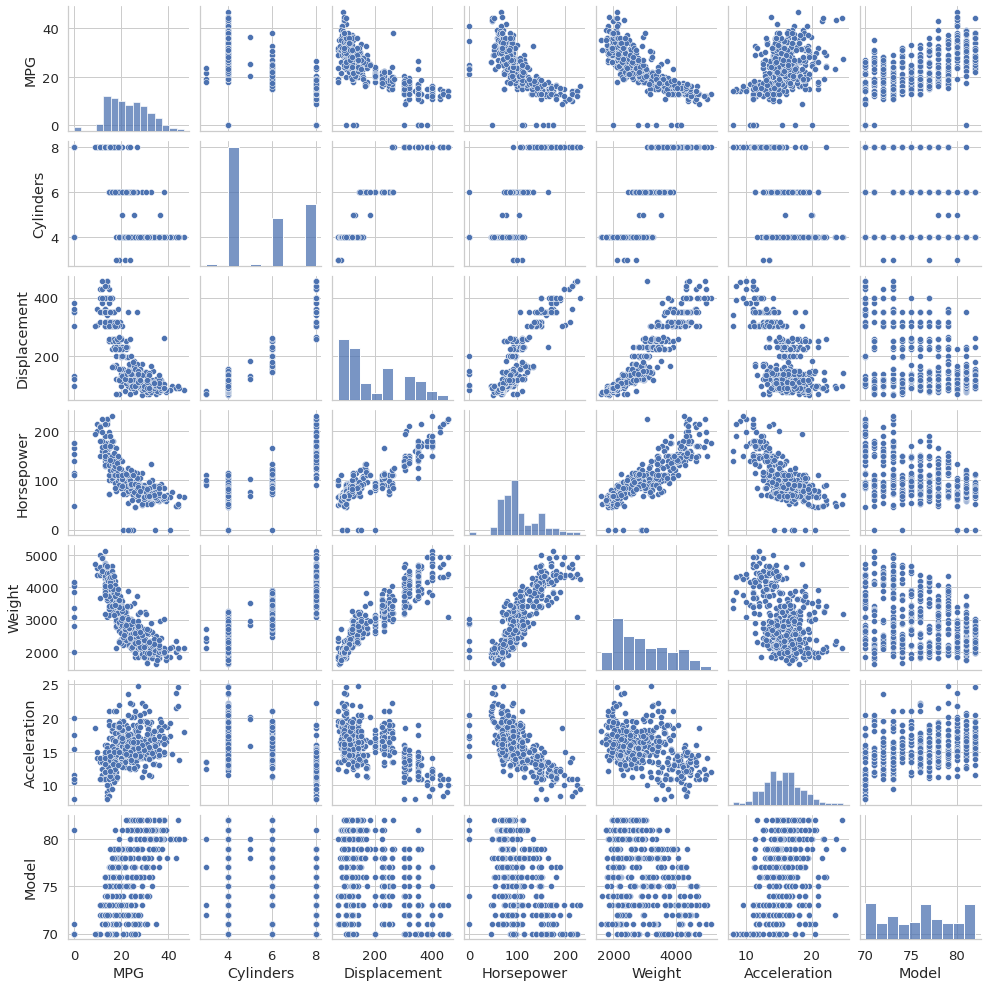

In [ ]:
sns.pairplot(df, size = 2)

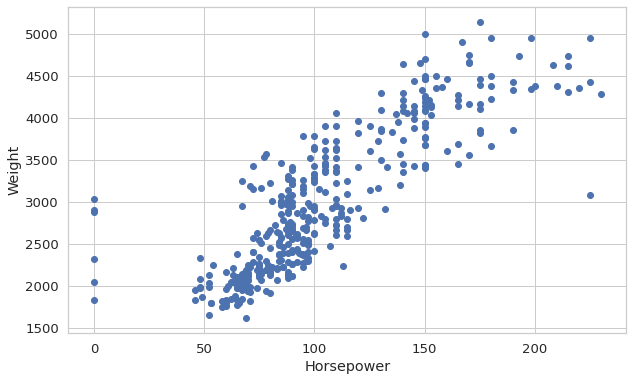

In [ ]:
plt.figure(figsize = (10, 6))
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.scatter(df.Horsepower, df.Weight)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df[['Horsepower']], df[['Weight']], train_size = 0.75, test_size = 0.25, random_state = 100)

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X1_train, y1_train)
m = lr.coef_

c = lr.intercept_

print('Slope:', m[0])
print('Intercept:', c)

Slope: [17.78103406]
Intercept: [1125.07376767]


In [ ]:
predicted_data = lr.predict(X1_test[['Horsepower']])
predicted_data[0:5]

array([[2992.08234421],
       [2369.74615203],
       [2689.80476515],
       [2725.36683328],
       [2405.30822016]])

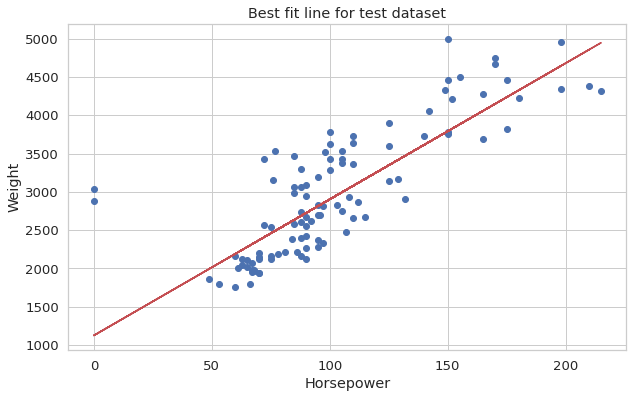

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(X1_test, y1_test)
plt.plot(X1_test['Horsepower'], predicted_data, 'r')
plt.title('Best fit line for test dataset')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()

In [ ]:
y1_test.head()

,Weight
233,3425.0
309,2150.0
377,2395.0
320,2678.0
161,3432.0


In [ ]:
test_data_array = np.array(y1_test)
test_data_array[0:5]

array([[3425.],
       [2150.],
       [2395.],
       [2678.],
       [3432.]])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_data_array, predicted_data)
print(r2)

0.6421979342285045


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


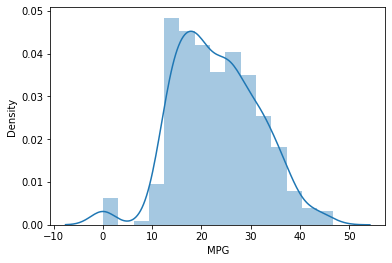

In [ ]:
sns.distplot(df['MPG'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


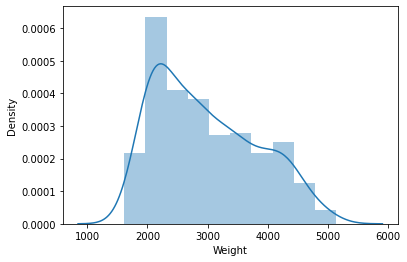

In [ ]:
sns.distplot(df['Weight'])

In [ ]:
df['Weight'].isnull().sum()

0

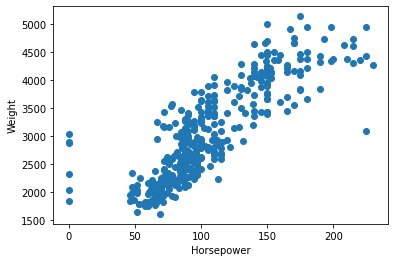

In [ ]:
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.scatter(df.Horsepower, df.Weight)

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [ ]:
import re 

In [ ]:
car_mfc = df['Car']
car_mfc

0      Chevrolet Chevelle Malibu
1              Buick Skylark 320
2             Plymouth Satellite
3                  AMC Rebel SST
4                    Ford Torino
                 ...            
401              Ford Mustang GL
402            Volkswagen Pickup
403                Dodge Rampage
404                  Ford Ranger
405                   Chevy S-10
Name: Car, Length: 406, dtype: object

In [ ]:
rows = []
for n in range(406):
  mfc = df['Car'].str.split(" ")[n][0]
  rows.append([mfc])
  #print(mfc)
  
#df['Mfc']
df2 = pd.DataFrame(rows, columns=["Mfc"])
print(df2)

            Mfc
0     Chevrolet
1         Buick
2      Plymouth
3           AMC
4          Ford
..          ...
401        Ford
402  Volkswagen
403       Dodge
404        Ford
405       Chevy

[406 rows x 1 columns]


In [ ]:
df2['Mfc'].value_counts()

Ford             53
Chevrolet        45
Plymouth         32
AMC              29
Dodge            28
Toyota           26
Datsun           23
Volkswagen       23
Buick            17
Pontiac          16
Honda            13
Mazda            12
Mercury          11
Oldsmobile       10
Peugeot           8
Fiat              8
Audi              7
Volvo             6
Chrysler          6
Saab              5
Renault           5
Opel              4
Subaru            4
Mercedes-Benz     2
Chevy             2
BMW               2
Cadillac          2
Mercedes          1
Capri             1
Triumph           1
Nissan            1
Hi                1
Chevrolete        1
Citroen           1
Name: Mfc, dtype: int64

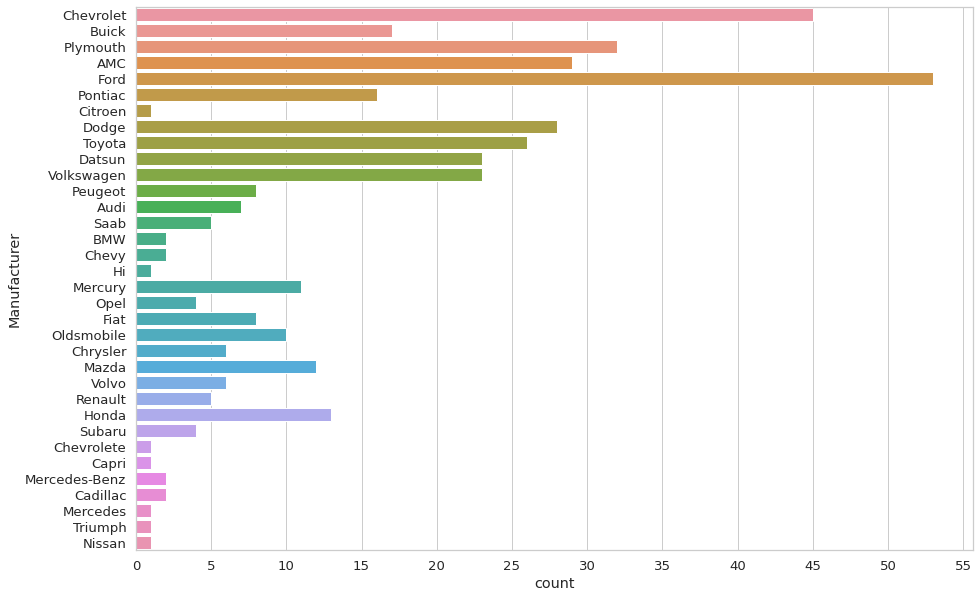

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(np.arange(0,60, 5.0))
sns.countplot(y = df2.Mfc)

plt.ylabel('Manufacturer')
plt.show()

In [ ]:
df['Manufacturer'] = df2['Mfc']
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Manufacturer
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,Chevrolet
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,Buick
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,Plymouth
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,AMC
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,Ford
...,...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US,Ford
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,Volkswagen
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US,Dodge
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US,Ford


In [ ]:
df = df.drop(['Mfc'], axis = 1)

In [ ]:
eu_cars = df[df['Origin']== 'Europe']
eu_cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Manufacturer
10,Citroen DS-21 Pallas,0.0,4,133.0,115.0,3090.0,17.5,70,Europe,Citroen
25,Volkswagen 1131 Deluxe Sedan,26.0,4,97.0,46.0,1835.0,20.5,70,Europe,Volkswagen
26,Peugeot 504,25.0,4,110.0,87.0,2672.0,17.5,70,Europe,Peugeot
27,Audi 100 LS,24.0,4,107.0,90.0,2430.0,14.5,70,Europe,Audi
28,Saab 99e,25.0,4,104.0,95.0,2375.0,17.5,70,Europe,Saab
...,...,...,...,...,...,...,...,...,...,...
366,Peugeot 505s Turbo Diesel,28.1,4,141.0,80.0,3230.0,20.4,81,Europe,Peugeot
367,Saab 900s,0.0,4,121.0,110.0,2800.0,15.4,81,Europe,Saab
368,Volvo Diesel,30.7,6,145.0,76.0,3160.0,19.6,81,Europe,Volvo
383,Volkswagen Rabbit l,36.0,4,105.0,74.0,1980.0,15.3,82,Europe,Volkswagen


In [ ]:
ford = df[df['Manufacturer'] == 'Ford']
ford

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Manufacturer
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,Ford
5,Ford Galaxie 500,15.0,8,429.0,198.0,4341.0,10.0,70,US,Ford
12,Ford Torino (sw),0.0,8,351.0,153.0,4034.0,11.0,70,US,Ford
17,Ford Mustang Boss 302,0.0,8,302.0,140.0,3353.0,8.0,70,US,Ford
23,Ford Maverick,21.0,6,200.0,85.0,2587.0,16.0,70,US,Ford
31,Ford F250,10.0,8,360.0,215.0,4615.0,14.0,70,US,Ford
38,Ford Pinto,25.0,4,98.0,0.0,2046.0,19.0,71,US,Ford
43,Ford Torino 500,19.0,6,250.0,88.0,3302.0,15.5,71,US,Ford
47,Ford Galaxie 500,14.0,8,351.0,153.0,4154.0,13.5,71,US,Ford
50,Ford Country Squire (sw),13.0,8,400.0,170.0,4746.0,12.0,71,US,Ford
